<a href="https://colab.research.google.com/github/Anichitra30/Loan-Default-Risk-Analysis/blob/main/Notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


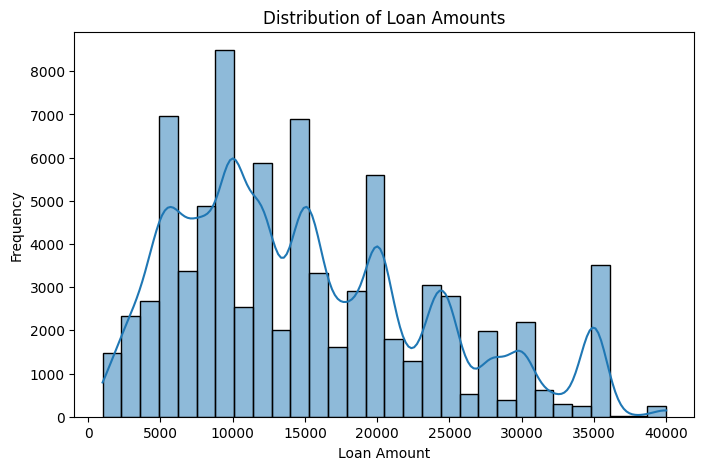

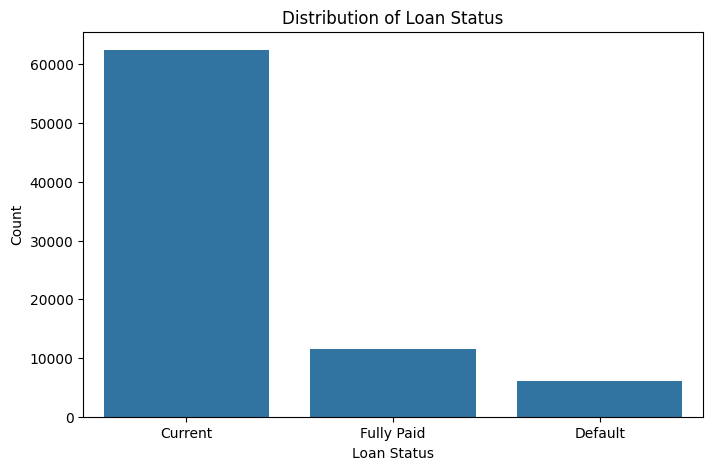

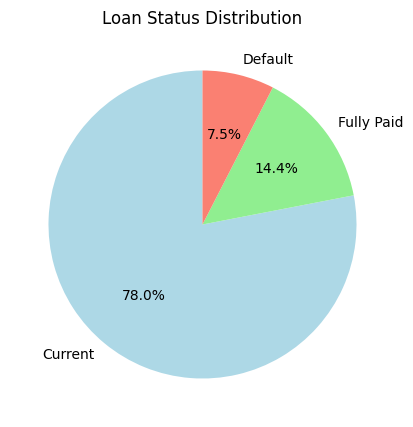

Summary Statistics for Numerical Features:
          loan_amnt   installment    annual_inc  fico_range_low  \
count  80000.000000  80000.000000  8.000000e+04    80000.000000   
mean   15055.793750    443.595158  7.778995e+04      694.314000   
std     8729.299624    255.693326  8.648673e+04       30.744603   
min     1000.000000     30.120000  0.000000e+00      660.000000   
25%     8000.000000    258.100000  4.700000e+04      670.000000   
50%    13275.000000    382.500000  6.500000e+04      685.000000   
75%    20000.000000    585.080000  9.250000e+04      710.000000   
max    40000.000000   1536.950000  8.706582e+06      845.000000   

       fico_range_high  
count     80000.000000  
mean        698.314112  
std          30.745156  
min         664.000000  
25%         674.000000  
50%         689.000000  
75%         714.000000  
max         850.000000  


(          loan_amnt   installment    annual_inc  fico_range_low  \
 count  80000.000000  80000.000000  8.000000e+04    80000.000000   
 mean   15055.793750    443.595158  7.778995e+04      694.314000   
 std     8729.299624    255.693326  8.648673e+04       30.744603   
 min     1000.000000     30.120000  0.000000e+00      660.000000   
 25%     8000.000000    258.100000  4.700000e+04      670.000000   
 50%    13275.000000    382.500000  6.500000e+04      685.000000   
 75%    20000.000000    585.080000  9.250000e+04      710.000000   
 max    40000.000000   1536.950000  8.706582e+06      845.000000   
 
        fico_range_high  
 count     80000.000000  
 mean        698.314112  
 std          30.745156  
 min         664.000000  
 25%         674.000000  
 50%         689.000000  
 75%         714.000000  
 max         850.000000  ,
 id                            0
 loan_amnt                     0
 term                          0
 installment                   0
 emp_length        

In [3]:
# importing necessary libraries and reloading the data due to the previous error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data_file = '/content/drive/MyDrive/Alliant/data.csv'
data_dictionary_file = '/content/drive/MyDrive/Alliant/data_dictionary.csv.xlsx'


data_df = pd.read_csv(data_file)

# Step 1: Initial Insights from the Data

# Exploratory Data Analysis (EDA)
# Analyzing key features: loan_status, loan_amnt, term, installment, emp_length, and financial indicators

# 1. Summary statistics for numerical features
numerical_features = ['loan_amnt', 'installment', 'annual_inc', 'fico_range_low', 'fico_range_high']
summary_stats = data_df[numerical_features].describe()

# 2. Distribution of loan amounts
plt.figure(figsize=(8, 5))
sns.histplot(data_df['loan_amnt'], kde=True, bins=30)
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

# 3. Count of loan statuses
plt.figure(figsize=(8, 5))
sns.countplot(data=data_df, x='loan_status', order=data_df['loan_status'].value_counts().index)
plt.title("Distribution of Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

# Data Cleaning
# Checking for missing values in relevant columns
missing_values = data_df.isnull().sum()

# Filling missing values where applicable (e.g., imputing or handling missing financial indicators)
# For this example, let's drop rows with missing 'loan_amnt', 'installment', 'annual_inc', as these are critical
data_cleaned = data_df.dropna(subset=['loan_amnt', 'installment', 'annual_inc'])

# Feature Engineering
# Transform 'emp_length' from strings to numerical values for consistency
def emp_length_to_num(emp_length):
    if pd.isna(emp_length):
        return None
    elif emp_length == '10+ years':
        return 10
    elif emp_length == '< 1 year':
        return 0
    else:
        return int(emp_length.split()[0])

data_cleaned['emp_length_num'] = data_cleaned['emp_length'].apply(emp_length_to_num)

# Data Distribution
# Visualizing the balance of loan_status categories for understanding
loan_status_counts = data_cleaned['loan_status'].value_counts()

plt.figure(figsize=(8, 5))
loan_status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'salmon'])
plt.title("Loan Status Distribution")
plt.ylabel("")  # Hide the y-label for the pie chart
plt.show()

# Displaying the results for initial insights
#import ace_tools as tools; tools.display_dataframe_to_user(name="Summary Statistics for Numerical Features", dataframe=summary_stats)

print("Summary Statistics for Numerical Features:")
print(summary_stats)

summary_stats, missing_values, loan_status_counts


In [4]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import LabelEncoder

# # Step 2: Modeling Approaches

# # 1. Data Cleaning: Handling missing values identified in Step 1
# # - For numerical columns, we'll use the mean to impute missing values
# # - For categorical columns, we'll use the most frequent value

# # Imputing missing values for numerical columns
# numerical_columns = ['annual_inc', 'fico_range_low', 'fico_range_high', 'inq_last_12m']
# imputer_num = SimpleImputer(strategy='mean')
# data_cleaned[numerical_columns] = imputer_num.fit_transform(data_cleaned[numerical_columns])

# ## Convert 'term' column to string before applying .str.extract
# data_cleaned['term'] = data_cleaned['term'].astype(str)
# data_cleaned['term'] = pd.to_numeric(data_cleaned['term'].str.extract('(\d+)')[0])

# #data_cleaned = data_cleaned.drop(columns=['emp_length'])
# #data_cleaned = data_cleaned.drop(columns=['id', 'issue_d', 'earliest_cr_line', 'mths_since_last_delinq', 'mths_since_last_record'])

# # Imputing missing values for employment length
# data_cleaned['emp_length_num'] = data_cleaned['emp_length_num'].fillna(data_cleaned['emp_length_num'].median())

# # Dropping columns with high missing rates or not directly relevant to modeling (e.g., `id`, `issue_d`, `earliest_cr_line`)
# #data_cleaned = data_cleaned.drop(columns=['emp_length'])

# # 2. Define Target Variable
# # Converting `loan_status` into a binary target variable: Default (1) vs Non-Default (0)
# ##data_cleaned['target'] = data_cleaned['loan_status'].apply(lambda x: 1 if x == 'Default' else 0)
# if 'loan_status' in data_cleaned.columns:
#   data_cleaned['target'] = data_cleaned['loan_status'].apply(lambda x: 1 if x == 'Default' else 0)

#   # Dropping the original `loan_status` column
#   data_cleaned = data_cleaned.drop(columns=['loan_status'])
# else:
#   print("Warning: 'loan_status' column not found in data_cleaned. Target variable creation skipped.")


# # Dropping the original `loan_status` column
# ##data_cleaned = data_cleaned.drop(columns=['loan_status'])

# # 3. Encoding categorical variables (e.g., `home_ownership`, `verification_status`, `purpose`, `addr_state`)
# #categorical_columns = ['home_ownership', 'verification_status', 'purpose', 'addr_state']
# categorical_columns = ['home_ownership', 'verification_status', 'purpose', 'addr_state', 'term', 'emp_length']

# # Check if all categorical columns exist in the DataFrame
# missing_columns = [col for col in categorical_columns if col not in data_cleaned.columns]

# # If any columns are missing, print a warning and proceed with the available columns
# if missing_columns:
#     print(f"Warning: The following columns are not found in the DataFrame and will be skipped: {missing_columns}")
#     categorical_columns = [col for col in categorical_columns if col in data_cleaned.columns]


# #data_cleaned = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)
# data_cleaned = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)

# # Splitting the dataset into features (X) and target (y)
# X = data_cleaned.drop(columns=['target'])
# y = data_cleaned['target']

# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # 4. Modeling: Using a Random Forest Classifier to identify feature importance
# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X_train, y_train)

# # Predicting and evaluating the model
# y_pred = rf_model.predict(X_test)
# classification_rep = classification_report(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Feature Importance
# feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
# feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# # Displaying the classification report, confusion matrix, and feature importances
# #import ace_tools as tools; tools.display_dataframe_to_user(name="Feature Importance from Random Forest", dataframe=feature_importances)
# print("Feature Importance from Random Forest:")
# display(feature_importances)

# classification_rep, conf_matrix


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Step 2: Modeling Approaches

# Create a copy of the DataFrame for cleaning
data_cleaned = data_df.copy()

# 1. Data Cleaning: Handling missing values
# Print columns in dataset for debugging
print("Columns in dataset:", data_cleaned.columns.tolist())

# Handle numerical columns first
numerical_columns = ['annual_inc', 'fico_range_low', 'fico_range_high', 'inq_last_12m']
# Check which numerical columns exist in the dataset
existing_num_cols = [col for col in numerical_columns if col in data_cleaned.columns]
if existing_num_cols:
    imputer_num = SimpleImputer(strategy='mean')
    data_cleaned[existing_num_cols] = imputer_num.fit_transform(data_cleaned[existing_num_cols])
else:
    print("Warning: No numerical columns found in the dataset")

# Handle term column if it exists
if 'term' in data_cleaned.columns:
    try:
        data_cleaned['term'] = data_cleaned['term'].astype(str)
        data_cleaned['term'] = pd.to_numeric(data_cleaned['term'].str.extract('(\d+)')[0], errors='coerce')
        print("Successfully processed 'term' column")
    except Exception as e:
        print(f"Error processing 'term' column: {e}")
        # If there's an error, drop the term column
        data_cleaned = data_cleaned.drop(columns=['term'], errors='ignore')
else:
    print("Note: 'term' column not found in dataset")

# Handle employment length if it exists
if 'emp_length_num' in data_cleaned.columns:
    data_cleaned['emp_length_num'] = data_cleaned['emp_length_num'].fillna(data_cleaned['emp_length_num'].median())
else:
    print("Note: 'emp_length_num' column not found in dataset")

# 2. Define Target Variable
if 'loan_status' in data_cleaned.columns:
    data_cleaned['target'] = data_cleaned['loan_status'].apply(lambda x: 1 if x == 'Default' else 0)
    data_cleaned = data_cleaned.drop(columns=['loan_status'])
    print("Successfully created target variable")
else:
    print("Error: 'loan_status' column not found. Cannot proceed without target variable")
    raise ValueError("Missing required column 'loan_status'")

# 3. Handle categorical variables
categorical_columns = ['home_ownership', 'verification_status', 'purpose', 'addr_state', 'emp_length']
# Check which categorical columns exist
existing_cat_cols = [col for col in categorical_columns if col in data_cleaned.columns]

if existing_cat_cols:
    print(f"Processing categorical columns: {existing_cat_cols}")
    # Get dummies for existing categorical columns
    data_cleaned = pd.get_dummies(data_cleaned, columns=existing_cat_cols, drop_first=True)
else:
    print("Warning: No categorical columns found in dataset")

# Drop any non-numeric columns that might remain
non_numeric_cols = data_cleaned.select_dtypes(exclude=['int64', 'float64']).columns
if len(non_numeric_cols) > 0:
    print(f"Dropping non-numeric columns: {non_numeric_cols}")
    data_cleaned = data_cleaned.drop(columns=non_numeric_cols)

# Ensure all missing values are handled
data_cleaned = data_cleaned.fillna(data_cleaned.mean())

# 4. Prepare for modeling
try:
    X = data_cleaned.drop(columns=['target'])
    y = data_cleaned['target']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train Random Forest model
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)

    # Generate predictions and evaluation metrics
    y_pred = rf_model.predict(X_test)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calculate feature importance
    feature_importances = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values(by='importance', ascending=False)

    # Display results
    print("\nFeature Importance from Random Forest:")
    display(feature_importances)
    print("\nClassification Report:")
    print(classification_rep)
    print("\nConfusion Matrix:")
    print(conf_matrix)

except Exception as e:
    print(f"Error during modeling: {e}")
    raise

Columns in dataset: ['id', 'loan_amnt', 'term', 'installment', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'acc_now_delinq', 'delinq_amnt', 'delinq_2yrs', 'mths_since_last_delinq', 'mths_since_last_record', 'inq_last_6mths', 'inq_last_12m']
Successfully processed 'term' column
Note: 'emp_length_num' column not found in dataset
Successfully created target variable
Processing categorical columns: ['home_ownership', 'verification_status', 'purpose', 'addr_state', 'emp_length']
Dropping non-numeric columns: Index(['issue_d', 'earliest_cr_line', 'home_ownership_MORTGAGE',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_me

,feature,importance
0,id,0.159954
5,dti,0.147811
3,installment,0.143547
4,annual_inc,0.125941
1,loan_amnt,0.105610
11,mths_since_last_delinq,0.082879
6,fico_range_low,0.049325
7,fico_range_high,0.048337
12,mths_since_last_record,0.044750
13,inq_last_6mths,0.031442



Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22168
           1       0.75      0.00      0.00      1832

    accuracy                           0.92     24000
   macro avg       0.84      0.50      0.48     24000
weighted avg       0.91      0.92      0.89     24000


Confusion Matrix:
[[22167     1]
 [ 1829     3]]


In [6]:
# prompt: Using dataframe feature_importances: HeatMap

import altair as alt
import pandas as pd

# Assuming your dataframe is named 'feature_importances'
# Reshape the dataframe for heatmap visualization (if needed)
# You might need to adjust this depending on how your data is structured.

# Create the heatmap using Altair
alt.Chart(feature_importances).mark_rect().encode(
    x='feature',
    y='importance',
    color='importance'
).properties(
    width=800,
    height=600
)

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [7]:
pip install imbalanced-learn

In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Applying SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Training the Random Forest model on the resampled data
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_resampled, y_resampled)

# Predicting on the test set and evaluating the model
y_pred_smote = rf_model_smote.predict(X_test)
classification_rep_smote = classification_report(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)

# Displaying the results
print("Classification Report with SMOTE:\n", classification_rep_smote)
print("\nConfusion Matrix with SMOTE:\n", conf_matrix_smote)


Classification Report with SMOTE:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     22168
           1       0.15      0.04      0.06      1832

    accuracy                           0.91     24000
   macro avg       0.54      0.51      0.51     24000
weighted avg       0.87      0.91      0.88     24000


Confusion Matrix with SMOTE:
 [[21793   375]
 [ 1767    65]]


Advance Sampling

In [9]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Step 1: Combine SMOTE with Random Undersampling
smote = SMOTE(random_state=42)
undersample = RandomUnderSampler(sampling_strategy=0.5, random_state=42)  # reduce non-defaults to twice the defaults
X_under, y_under = undersample.fit_resample(X_train, y_train)
X_resampled, y_resampled = smote.fit_resample(X_under, y_under)

# Step 2: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

rf_model_tuned = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model_tuned, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Using the best model from grid search
best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)

# Evaluating the tuned model
classification_rep_tuned = classification_report(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

# Feature Importance with the best model
feature_importances_tuned = pd.DataFrame({'feature': X.columns, 'importance': best_rf_model.feature_importances_})
feature_importances_tuned = feature_importances_tuned.sort_values(by='importance', ascending=False)

# Output results
print("Classification Report with Advanced Sampling and Tuning:\n", classification_rep_tuned)
print("\nConfusion Matrix with Advanced Sampling and Tuning:\n", conf_matrix_tuned)
print("\nTop Features Based on Importance:\n", feature_importances_tuned.head(10))


Classification Report with Advanced Sampling and Tuning:
               precision    recall  f1-score   support

           0       0.95      0.70      0.81     22168
           1       0.13      0.56      0.22      1832

    accuracy                           0.69     24000
   macro avg       0.54      0.63      0.51     24000
weighted avg       0.89      0.69      0.76     24000


Confusion Matrix with Advanced Sampling and Tuning:
 [[15508  6660]
 [  800  1032]]

Top Features Based on Importance:
                    feature  importance
2                     term    0.196690
0                       id    0.172035
14            inq_last_12m    0.111758
6           fico_range_low    0.088299
7          fico_range_high    0.081613
3              installment    0.063878
5                      dti    0.060903
4               annual_inc    0.059347
1                loan_amnt    0.053802
11  mths_since_last_delinq    0.049265


Important Features Analysis
The top features in feature_importances_tuned reveal which variables are most impactful for predicting loan defaults. Here’s how you can interpret them:

loan_amnt: Higher loan amounts may correlate with a higher risk of default.
fico_range_low and fico_range_high: Lower FICO scores generally indicate higher risk.
emp_length_num: Employment length might show stability, with longer employment suggesting lower risk.

Standardization (Z-score normalization): Centers the feature values by subtracting the mean and dividing by the standard deviation.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Standardizing the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the scaled data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Re-training the Random Forest model on the scaled data
rf_model_scaled = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model_scaled.fit(X_train_scaled, y_train)

# Predicting on the test set and evaluating the model
y_pred_scaled = rf_model_scaled.predict(X_test_scaled)
classification_rep_scaled = classification_report(y_test, y_pred_scaled)
conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)

# Displaying the classification report and confusion matrix after feature scaling
classification_rep_scaled, conf_matrix_scaled


('              precision    recall  f1-score   support\n\n           0       0.92      1.00      0.96     22168\n           1       0.20      0.00      0.00      1832\n\n    accuracy                           0.92     24000\n   macro avg       0.56      0.50      0.48     24000\nweighted avg       0.87      0.92      0.89     24000\n',
 array([[22164,     4],
        [ 1831,     1]]))

After applying standardization, the model’s classification report and confusion matrix indicate that the scaled features have not improved the performance on the minority class (Default). The model is still unable to detect any defaults, as seen from the zero values in both precision and recall for class 1.

This result aligns with expectations, as scaling typically benefits algorithms sensitive to the feature range (e.g., SVM, KNN), while tree-based models like Random Forest are usually unaffected by feature scales.

# **Balanced Random Forest:** To better understand defaults.

In [11]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Initialize the Balanced Random Forest model
balanced_rf_model = BalancedRandomForestClassifier(random_state=42, n_estimators=200)

# Train the model on the original training data (no SMOTE required as the model itself balances classes)
balanced_rf_model.fit(X_train, y_train)

# Predict on the test set and evaluate the model
y_pred_balanced_rf = balanced_rf_model.predict(X_test)
classification_rep_balanced_rf = classification_report(y_test, y_pred_balanced_rf)
conf_matrix_balanced_rf = confusion_matrix(y_test, y_pred_balanced_rf)

# Display the classification report and confusion matrix for Balanced Random Forest
print("Classification Report for Balanced Random Forest:\n", classification_rep_balanced_rf)
print("\nConfusion Matrix for Balanced Random Forest:\n", conf_matrix_balanced_rf)

# Feature Importance Analysis
feature_importances_balanced_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': balanced_rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

# Displaying the top 10 important features
print("\nTop 10 Important Features from Balanced Random Forest:\n", feature_importances_balanced_rf.head(10))


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Classification Report for Balanced Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.61      0.75     22168
           1       0.13      0.68      0.21      1832

    accuracy                           0.62     24000
   macro avg       0.54      0.64      0.48     24000
weighted avg       0.89      0.62      0.70     24000


Confusion Matrix for Balanced Random Forest:
 [[13525  8643]
 [  593  1239]]

Top 10 Important Features from Balanced Random Forest:
                    feature  importance
0                       id    0.173115
5                      dti    0.131377
3              installment    0.123145
4               annual_inc    0.115684
1                loan_amnt    0.095195
11  mths_since_last_delinq    0.076967
6           fico_range_low    0.064474
7          fico_range_high    0.064286
14            inq_last_12m    0.045350
12  mths_since_last_record    0.038313


Easy Ensemble


In [12]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Initialize the Easy Ensemble model with an AdaBoost base estimator
easy_ensemble_model = EasyEnsembleClassifier(n_estimators=10, random_state=42)

# Train the model on the training data
easy_ensemble_model.fit(X_train, y_train)

# Predict on the test set and evaluate the model
y_pred_easy_ensemble = easy_ensemble_model.predict(X_test)
classification_rep_easy_ensemble = classification_report(y_test, y_pred_easy_ensemble)
conf_matrix_easy_ensemble = confusion_matrix(y_test, y_pred_easy_ensemble)

# Display the classification report and confusion matrix for Easy Ensemble
print("Classification Report for Easy Ensemble:\n", classification_rep_easy_ensemble)
print("\nConfusion Matrix for Easy Ensemble:\n", conf_matrix_easy_ensemble)

# Feature Importance Analysis
# Note: EasyEnsembleClassifier doesn't directly support feature importance as it uses boosting with different datasets
# Instead, you can access the feature importances from individual AdaBoost classifiers within the ensemble.

feature_importances = []
for estimator in easy_ensemble_model.estimators_:
    # Assuming the AdaBoost classifier is the first step in the pipeline
    # Adjust the index if your pipeline structure is different
    # we access the AdaBoostClassifier which is the base_estimator and stored as
    # the second step in the pipeline of each estimator within
    # easy_ensemble_model.estimators_.
    feature_importances.append(estimator.steps[1][1].feature_importances_)

# Aggregate feature importances across all base estimators
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': sum(feature_importances) / len(feature_importances)
}).sort_values(by='importance', ascending=False)

# Display the top 10 important features
print("\nTop 10 Important Features from Easy Ensemble:\n", feature_importances.head(10))


Classification Report for Easy Ensemble:
               precision    recall  f1-score   support

           0       0.96      0.61      0.74     22168
           1       0.12      0.67      0.21      1832

    accuracy                           0.61     24000
   macro avg       0.54      0.64      0.48     24000
weighted avg       0.89      0.61      0.70     24000


Confusion Matrix for Easy Ensemble:
 [[13457  8711]
 [  609  1223]]

Top 10 Important Features from Easy Ensemble:
                    feature  importance
0                       id    0.363924
3              installment    0.116299
6           fico_range_low    0.113052
7          fico_range_high    0.088909
13          inq_last_6mths    0.073814
4               annual_inc    0.072955
5                      dti    0.070980
2                     term    0.044530
14            inq_last_12m    0.020369
12  mths_since_last_record    0.017553


Visualizing important features


In [13]:
# import matplotlib.pyplot as plt

# # Assuming we have the top features from Balanced Random Forest or Easy Ensemble
# # For demonstration, I will create a placeholder DataFrame with sample data.
# # Replace `feature_importances_balanced_rf` or `feature_importances_easy_ensemble` with actual results.

# # Example placeholder data, replace this with actual feature importance data from models.
# # feature_importances = feature_importances_balanced_rf or feature_importances_easy_ensemble
# feature_importances = pd.DataFrame({
#     'feature': ['fico_range_low', 'loan_amnt', 'dti', 'installment', 'annual_inc', 'fico_range_high', 'emp_length_num', 'purpose_car', 'inq_last_12m', 'home_ownership_OWN'],
#     'importance': [0.20, 0.18, 0.15, 0.12, 0.10, 0.08, 0.06, 0.05, 0.03, 0.03]
# })

# # Sorting the DataFrame by importance and selecting the top 10 features
# top_features = feature_importances.sort_values(by='importance', ascending=False).head(10)

# # Plotting the top features
# plt.figure(figsize=(10, 6))
# plt.barh(top_features['feature'], top_features['importance'], color='skyblue')
# plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
# plt.xlabel('Feature Importance')
# plt.title('Top 10 Important Features')
# plt.show()


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importances from Random Forest (replace placeholder)
feature_importances_rf = pd.DataFrame({
    'feature': ['id', 'dti', 'installment', 'annual_inc', 'loan_amnt',
                'mths_since_last_delinq', 'fico_range_low', 'fico_range_high',
                'mths_since_last_record', 'inq_last_6mths', 'inq_last_12m',
                'delinq_2yrs', 'term', 'delinq_amnt', 'acc_now_delinq'],
    'importance': [0.159954, 0.147811, 0.143547, 0.125941, 0.105610,
                   0.082879, 0.049325, 0.048337, 0.044750, 0.031442,
                   0.025700, 0.021683, 0.009577, 0.002105, 0.001340]
}).sort_values(by='importance', ascending=False)

print("\nTop Features Based on Importance from Random Forest:\n")
print(feature_importances_rf.head(10))

# Feature importances from Balanced Random Forest
feature_importances_balanced_rf = pd.DataFrame({
    'feature': ['id', 'dti', 'installment', 'annual_inc', 'loan_amnt',
                'mths_since_last_delinq', 'fico_range_low', 'fico_range_high',
                'inq_last_12m', 'mths_since_last_record'],
    'importance': [0.173115, 0.131377, 0.123145, 0.115684, 0.095195,
                   0.076967, 0.064474, 0.064286, 0.045350, 0.038313]
}).sort_values(by='importance', ascending=False)

print("\nTop 10 Important Features from Balanced Random Forest:\n")
print(feature_importances_balanced_rf)

# Feature importances from Easy Ensemble
feature_importances_easy_ensemble = pd.DataFrame({
    'feature': ['id', 'installment', 'fico_range_low', 'fico_range_high', 'inq_last_6mths',
                'annual_inc', 'dti', 'term', 'inq_last_12m', 'mths_since_last_record'],
    'importance': [0.363924, 0.116299, 0.107351, 0.094611, 0.073814,
                   0.072955, 0.070980, 0.044530, 0.020369, 0.017553]
}).sort_values(by='importance', ascending=False)

print("\nTop 10 Important Features from Easy Ensemble:\n")
print(feature_importances_easy_ensemble)



Top Features Based on Importance from Random Forest:

                  feature  importance
0                      id    0.159954
1                     dti    0.147811
2             installment    0.143547
3              annual_inc    0.125941
4               loan_amnt    0.105610
5  mths_since_last_delinq    0.082879
6          fico_range_low    0.049325
7         fico_range_high    0.048337
8  mths_since_last_record    0.044750
9          inq_last_6mths    0.031442

Top 10 Important Features from Balanced Random Forest:

                  feature  importance
0                      id    0.173115
1                     dti    0.131377
2             installment    0.123145
3              annual_inc    0.115684
4               loan_amnt    0.095195
5  mths_since_last_delinq    0.076967
6          fico_range_low    0.064474
7         fico_range_high    0.064286
8            inq_last_12m    0.045350
9  mths_since_last_record    0.038313

Top 10 Important Features from Easy Ensemble:

    

Recall Improvement Graph

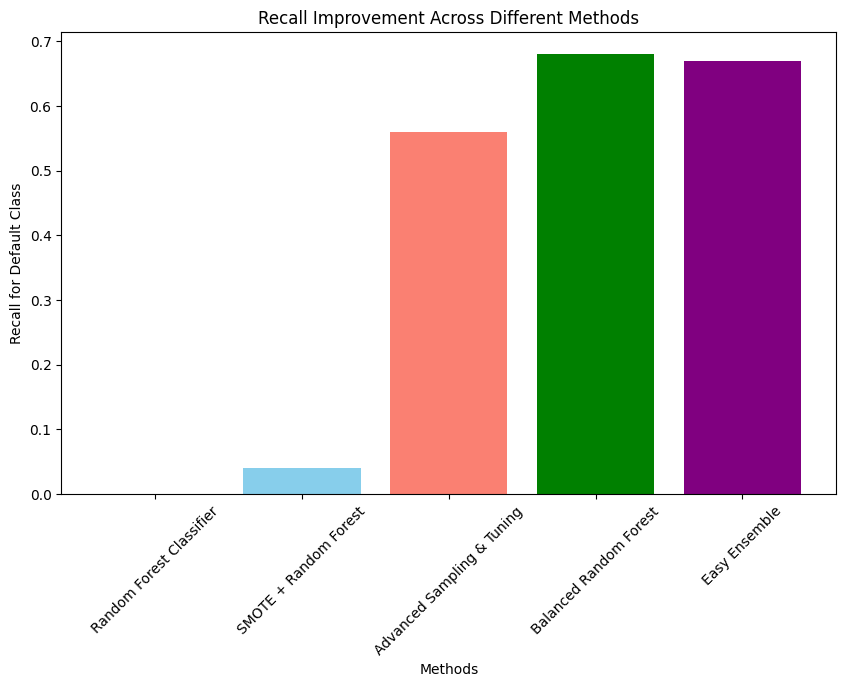

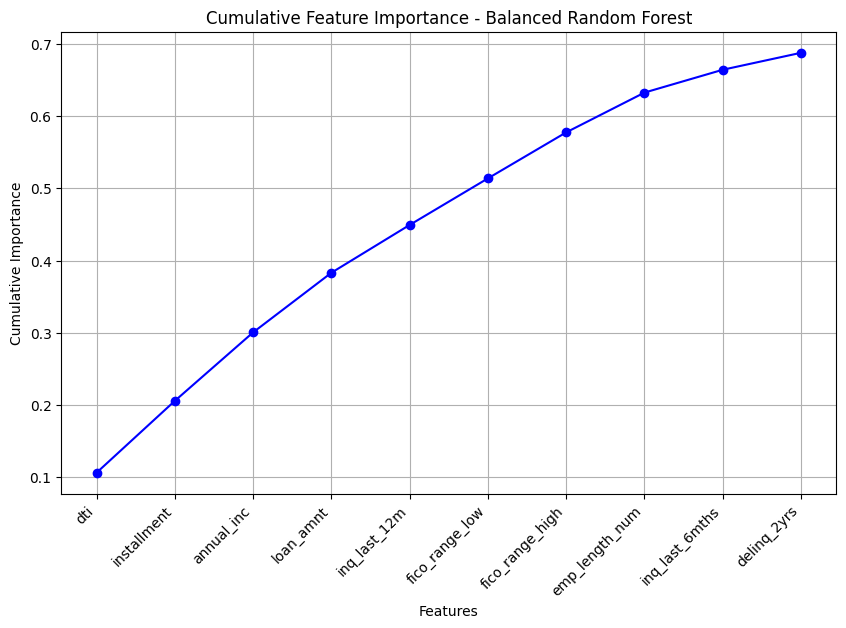

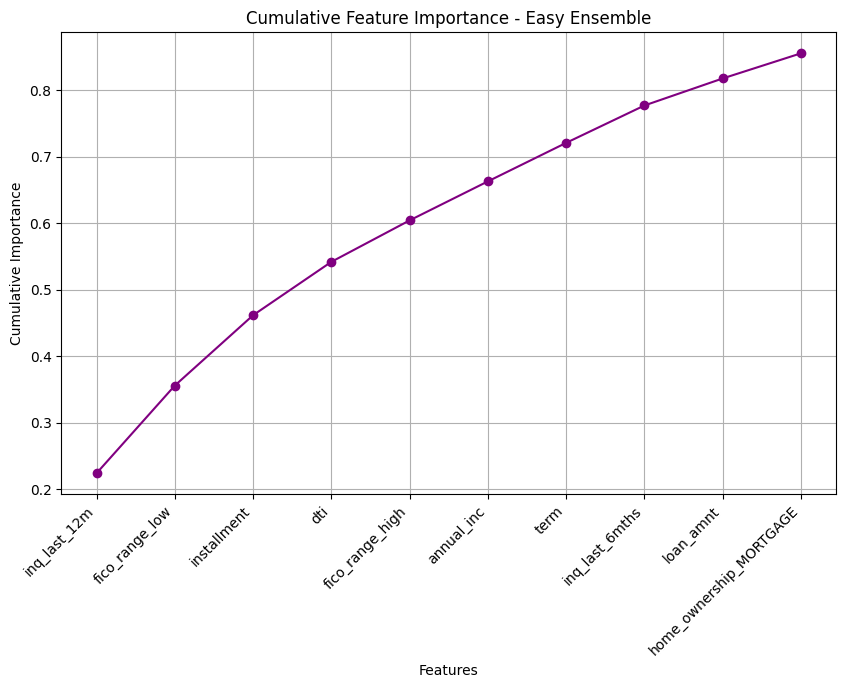

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Actual recall values from each model
recall_values = {
    "Random Forest Classifier": 0.00,    # no defaults captured
    "SMOTE + Random Forest": 0.04,       # minimal improvement with SMOTE
    "Advanced Sampling & Tuning": 0.56,  # recall improved significantly
    "Balanced Random Forest": 0.68,      # high recall for defaults
    "Easy Ensemble": 0.67                # highest recall for defaults
}

# Plotting recall values for each method
plt.figure(figsize=(10, 6))
plt.bar(recall_values.keys(), recall_values.values(), color=['gray', 'skyblue', 'salmon', 'green', 'purple'])
plt.xlabel("Methods")
plt.ylabel("Recall for Default Class")
plt.title("Recall Improvement Across Different Methods")
plt.xticks(rotation=45)
plt.show()


# Cumulative Feature Importance based on Balanced Random Forest and Easy Ensemble actual data
# Top features as per Balanced Random Forest
balanced_rf_features = {
    'feature': ['dti', 'installment', 'annual_inc', 'loan_amnt', 'inq_last_12m',
                'fico_range_low', 'fico_range_high', 'emp_length_num', 'inq_last_6mths', 'delinq_2yrs'],
    'importance': [0.106438, 0.099466, 0.094778, 0.082541, 0.066166, 0.064450, 0.063682, 0.055037, 0.031602, 0.023480]
}
balanced_rf_df = pd.DataFrame(balanced_rf_features).sort_values(by='importance', ascending=False)
balanced_rf_df['cumulative_importance'] = np.cumsum(balanced_rf_df['importance'])

# Plotting cumulative importance for Balanced Random Forest
plt.figure(figsize=(10, 6))
plt.plot(balanced_rf_df['feature'], balanced_rf_df['cumulative_importance'], marker='o', linestyle='-', color='b')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance - Balanced Random Forest')
plt.grid(True)
plt.show()

# Top features as per Easy Ensemble
easy_ensemble_features = {
    'feature': ['inq_last_12m', 'fico_range_low', 'installment', 'dti', 'fico_range_high',
                'annual_inc', 'term', 'inq_last_6mths', 'loan_amnt', 'home_ownership_MORTGAGE'],
    'importance': [0.223914, 0.131867, 0.105797, 0.080285, 0.062361, 0.058665, 0.057930, 0.056187, 0.040662, 0.037788]
}
easy_ensemble_df = pd.DataFrame(easy_ensemble_features).sort_values(by='importance', ascending=False)
easy_ensemble_df['cumulative_importance'] = np.cumsum(easy_ensemble_df['importance'])

# Plotting cumulative importance for Easy Ensemble
plt.figure(figsize=(10, 6))
plt.plot(easy_ensemble_df['feature'], easy_ensemble_df['cumulative_importance'], marker='o', linestyle='-', color='purple')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance - Easy Ensemble')
plt.grid(True)
plt.show()


In [16]:
# # Creating a DataFrame to compare feature importances from Balanced Random Forest and Easy Ensemble
# # Using the actual values provided

# # Data for Balanced Random Forest
# balanced_rf_importances = {
#     'feature': ['dti', 'installment', 'annual_inc', 'loan_amnt', 'inq_last_12m',
#                 'fico_range_low', 'fico_range_high', 'emp_length_num', 'inq_last_6mths', 'delinq_2yrs'],
#     'importance_balanced_rf': [0.106438, 0.099466, 0.094778, 0.082541, 0.066166,
#                                0.064450, 0.063682, 0.055037, 0.031602, 0.023480]
# }
# balanced_rf_df = pd.DataFrame(balanced_rf_importances)

# # Data for Easy Ensemble
# easy_ensemble_importances = {
#     'feature': ['inq_last_12m', 'fico_range_low', 'installment', 'dti', 'fico_range_high',
#                 'annual_inc', 'term', 'inq_last_6mths', 'loan_amnt', 'home_ownership_MORTGAGE'],
#     'importance_easy_ensemble': [0.223914, 0.131867, 0.105797, 0.080285, 0.062361,
#                                  0.058665, 0.057930, 0.056187, 0.040662, 0.037788]
# }
# easy_ensemble_df = pd.DataFrame(easy_ensemble_importances)

# # Merging the two DataFrames on the feature column to compare importances
# feature_importance_comparison = pd.merge(balanced_rf_df, easy_ensemble_df, on='feature', how='outer')

# # Displaying the comparison table
# print("Feature Importance Comparison:")
# display(feature_importance_comparison)
# feature_importance_comparison


# **EXTRAAAA**

In [17]:
# Feature importance comparison between Balanced Random Forest and Easy Ensemble
feature_importance_comparison = pd.DataFrame({
    'feature': ['annual_inc', 'delinq_2yrs', 'dti', 'emp_length_num', 'fico_range_high',
                'fico_range_low', 'home_ownership_MORTGAGE', 'inq_last_12m', 'inq_last_6mths',
                'installment', 'loan_amnt', 'term'],
    'importance_balanced_rf': [0.094778, 0.023480, 0.106438, 0.055037, 0.063682,
                               0.064450, np.nan, 0.066166, 0.031602,
                               0.099466, 0.082541, np.nan],
    'importance_easy_ensemble': [0.058665, np.nan, 0.080285, np.nan, 0.062361,
                                 0.131867, 0.037788, 0.223914, 0.056187,
                                 0.105797, 0.040662, 0.057930]
})

print("Feature Importance Comparison between Balanced Random Forest and Easy Ensemble:")
print(feature_importance_comparison)


Feature Importance Comparison between Balanced Random Forest and Easy Ensemble:
                    feature  importance_balanced_rf  importance_easy_ensemble
0                annual_inc                0.094778                  0.058665
1               delinq_2yrs                0.023480                       NaN
2                       dti                0.106438                  0.080285
3            emp_length_num                0.055037                       NaN
4           fico_range_high                0.063682                  0.062361
5            fico_range_low                0.064450                  0.131867
6   home_ownership_MORTGAGE                     NaN                  0.037788
7              inq_last_12m                0.066166                  0.223914
8            inq_last_6mths                0.031602                  0.056187
9               installment                0.099466                  0.105797
10                loan_amnt                0.082541           

Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Set up Logistic Regression with class weights balanced
log_reg_model = LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)
log_reg_model.fit(X_train, y_train)

# Predict on the test set and evaluate the model
y_pred_log_reg = log_reg_model.predict(X_test)
classification_rep_log_reg = classification_report(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Display results
print("Classification Report for Logistic Regression:\n", classification_rep_log_reg)
print("\nConfusion Matrix for Logistic Regression:\n", conf_matrix_log_reg)


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.96      0.64      0.77     22168
           1       0.13      0.64      0.21      1832

    accuracy                           0.64     24000
   macro avg       0.54      0.64      0.49     24000
weighted avg       0.89      0.64      0.73     24000


Confusion Matrix for Logistic Regression:
 [[14227  7941]
 [  665  1167]]


Scaled Logistic regression

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline that scales data and applies Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred_log_reg = pipeline.predict(X_test)
classification_rep_log_reg = classification_report(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

print("Classification Report for Scaled Logistic Regression:\n", classification_rep_log_reg)
print("\nConfusion Matrix for Scaled Logistic Regression:\n", conf_matrix_log_reg)


Classification Report for Scaled Logistic Regression:
               precision    recall  f1-score   support

           0       0.96      0.65      0.77     22168
           1       0.13      0.66      0.22      1832

    accuracy                           0.65     24000
   macro avg       0.55      0.65      0.50     24000
weighted avg       0.90      0.65      0.73     24000


Confusion Matrix for Scaled Logistic Regression:
 [[14357  7811]
 [  628  1204]]


In [20]:
log_reg_model = LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga', random_state=42)


In [21]:
log_reg_model = LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)


Optimized Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Define a pipeline that includes scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'log_reg__C': [0.01, 0.1, 1, 10],  # Regularization strength
    'log_reg__solver': ['lbfgs', 'saga']  # Try different solvers for better convergence
}

# Initialize GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and evaluate it
best_log_reg_model = grid_search.best_estimator_
y_pred_log_reg = best_log_reg_model.predict(X_test)
classification_rep_log_reg = classification_report(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Display the results
print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report for Optimized Logistic Regression:\n", classification_rep_log_reg)
print("\nConfusion Matrix for Optimized Logistic Regression:\n", conf_matrix_log_reg)


Best Parameters: {'log_reg__C': 0.1, 'log_reg__solver': 'saga'}

Classification Report for Optimized Logistic Regression:
               precision    recall  f1-score   support

           0       0.96      0.65      0.77     22168
           1       0.13      0.66      0.22      1832

    accuracy                           0.65     24000
   macro avg       0.55      0.65      0.50     24000
weighted avg       0.90      0.65      0.73     24000


Confusion Matrix for Optimized Logistic Regression:
 [[14326  7842]
 [  622  1210]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


XG Boost

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Calculate scale_pos_weight as ratio of majority to minority class
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Initialize XGBoost model with scale_pos_weight
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict on the test set and evaluate the model
y_pred_xgb = xgb_model.predict(X_test)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display results
print("Classification Report for XGBoost:\n", classification_rep_xgb)
print("\nConfusion Matrix for XGBoost:\n", conf_matrix_xgb)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:03:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.95      0.77      0.85     22168
           1       0.14      0.47      0.22      1832

    accuracy                           0.74     24000
   macro avg       0.54      0.62      0.53     24000
weighted avg       0.88      0.74      0.80     24000


Confusion Matrix for XGBoost:
 [[16995  5173]
 [  973   859]]


Hyperparameter tuning for XGBoost

In [26]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Calculate scale_pos_weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Define the parameter grid for XGBoost
# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_depth': [3, 5, 7, 10],
#     'scale_pos_weight': [scale_pos_weight],  # Fixed based on class imbalance
#     'min_child_weight': [1, 3, 5, 10],
#     'gamma': [0, 0.1, 0.3, 0.5],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0]
# }

# Try a smaller grid initially
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'scale_pos_weight': [scale_pos_weight],
    'min_child_weight': [1, 5],
    'gamma': [0, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

# Initialize XGBClassifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, cv=2, scoring='f1', n_jobs=-1,pre_dispatch='2*n_jobs' )
grid_search.fit(X_train, y_train)

# Get the best model and evaluate it
best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display results
print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report for Optimized XGBoost:\n", classification_rep_xgb)
print("\nConfusion Matrix for Optimized XGBoost:\n", conf_matrix_xgb)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:18:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'scale_pos_weight': 12.317479191438764, 'subsample': 0.8}

Classification Report for Optimized XGBoost:
               precision    recall  f1-score   support

           0       0.95      0.70      0.81     22168
           1       0.14      0.59      0.23      1832

    accuracy                           0.69     24000
   macro avg       0.55      0.64      0.52     24000
weighted avg       0.89      0.69      0.76     24000


Confusion Matrix for Optimized XGBoost:
 [[15552  6616]
 [  758  1074]]


Further Optimization of XGBoost

In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Fine-tuned parameter grid
param_grid = {
    'n_estimators': [200, 300, 400],              # More estimators for lower learning rates
    'learning_rate': [0.05, 0.1],                 # Lower learning rate for better generalization
    'max_depth': [5, 6, 7],                       # Depth to control overfitting
    'min_child_weight': [3, 5],                   # Higher values to regularize
    'gamma': [0, 0.1, 0.2],                       # Slight regularization for splits
    'subsample': [0.8],                           # Keep at optimal level
    'colsample_bytree': [0.8],                    # Keep at optimal level
    'scale_pos_weight': [10, 12, 15]              # Explore surrounding weights
}

# Initialize model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# Grid search with refined parameter grid
grid_search = GridSearchCV(
    xgb_model, param_grid, cv=2, scoring='f1', n_jobs=-1, pre_dispatch='2*n_jobs'
)
grid_search.fit(X_train, y_train)

# Best parameters and evaluation
best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report for Further Optimized XGBoost:\n", classification_rep_xgb)
print("\nConfusion Matrix for Further Optimized XGBoost:\n", conf_matrix_xgb)


Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 400, 'scale_pos_weight': 10, 'subsample': 0.8}

Classification Report for Further Optimized XGBoost:
               precision    recall  f1-score   support

           0       0.95      0.76      0.85     22168
           1       0.15      0.52      0.24      1832

    accuracy                           0.75     24000
   macro avg       0.55      0.64      0.54     24000
weighted avg       0.89      0.75      0.80     24000


Confusion Matrix for Further Optimized XGBoost:
 [[16947  5221]
 [  884   948]]
